# 机器学习大作业-威斯康星州乳腺癌分类
------
* from 物联网工程22-1班 柯梦然 2022217573、2022217565

 模拟一个端到端的项目案例，假如我是一个医院最近新雇佣的数据科学家，以下是我经历的主要步骤：
  1. 观察大局
  2. 获得数据
  3. 从数据探索和可视化中获得洞见
  4. 机器学习算法的数据准备
  5. 选择和训练模型
  6. 微调模型
  7. 展示解决方案
  8. 启动、监控和维护系统

## 设置

In [1]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
#Load libraries for data processing
import pandas as pd 
from scipy.stats import norm
import seaborn as sns # visualization
import warnings
warnings.filterwarnings("ignore")

## 1.观察大局

### 1.1使用Kaggle数据平台上的美国威斯康辛州的癌症数据。
模型需要从这个数据中学习，从而能够根据所有其他指标，做出病人是否患癌的决策。

In [2]:
data = pd.read_csv('data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 1.2查看并统计数据

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<Axes: xlabel='diagnosis'>

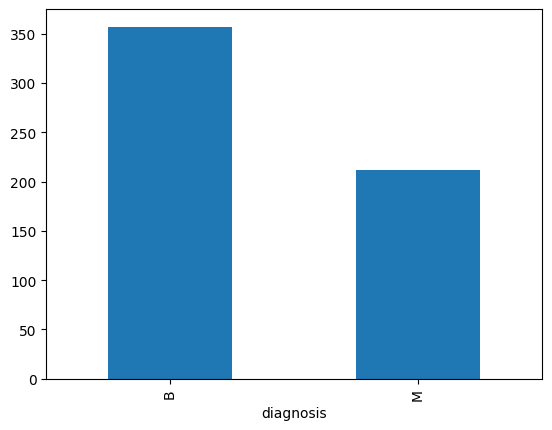

In [4]:
# 对标签进行统计
data.diagnosis.value_counts().plot(kind = "bar")

In [5]:
#check for missing variables
print(f"异常数据总数:{data.isnull().any().sum()}")
print("异常数据：")
print(data.isnull().any())

异常数据总数:1
异常数据：
id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       F

In [6]:
print("数据可视化：")
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

#basic descriptive statistics
data.iloc[:,2:32].describe()

数据可视化：


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Group by diagnosis and review the output.
# 一般用于组内聚合统计，如计算组间的均值，中位数等
diag_gr = data.groupby('diagnosis', axis=0)
diag_gr.median()
diag_gr.size()  # 等同于 data.diagnosis.value_counts()

diagnosis
B    357
M    212
dtype: int64

In [8]:
# 统一设置 图片背景和图片尺寸
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})

### 直方图

<Axes: xlabel='diagnosis', ylabel='count'>

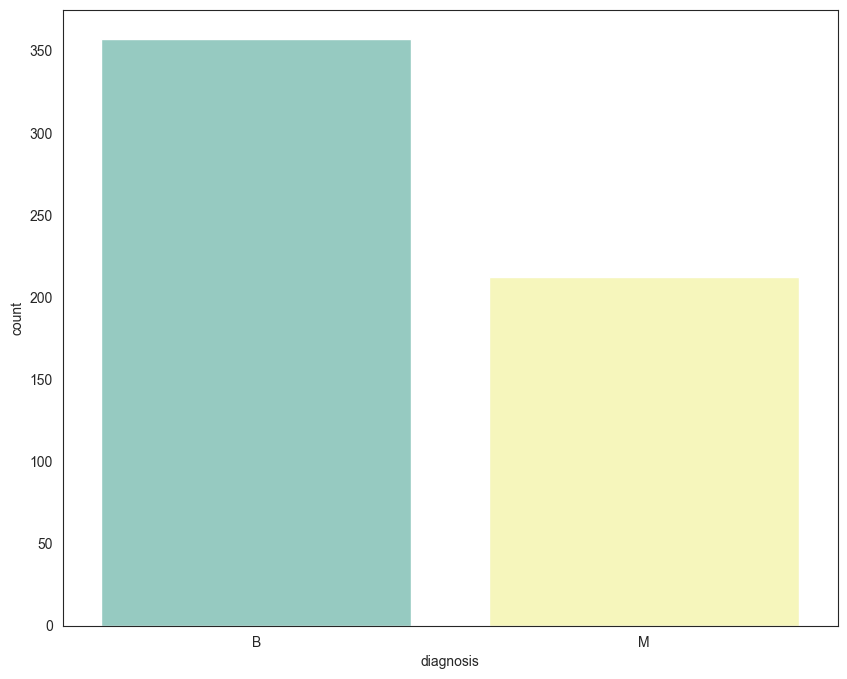

In [9]:
sns.countplot(x=data['diagnosis'],palette="Set3", order=["B","M"])  # order 指定画图顺序

### 将特征划分为三组

In [10]:
#For a merge + slice:
data_mean=data.iloc[:,2:12]
data_se=data.iloc[:,12:22]
data_worst=data.iloc[:,22:32]

print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### 各组特征可视化

array([[<Axes: title={'center': 'radius_worst'}>,
        <Axes: title={'center': 'texture_worst'}>,
        <Axes: title={'center': 'perimeter_worst'}>],
       [<Axes: title={'center': 'area_worst'}>,
        <Axes: title={'center': 'smoothness_worst'}>,
        <Axes: title={'center': 'compactness_worst'}>],
       [<Axes: title={'center': 'concavity_worst'}>,
        <Axes: title={'center': 'concave points_worst'}>,
        <Axes: title={'center': 'symmetry_worst'}>],
       [<Axes: title={'center': 'fractal_dimension_worst'}>, <Axes: >,
        <Axes: >]], dtype=object)

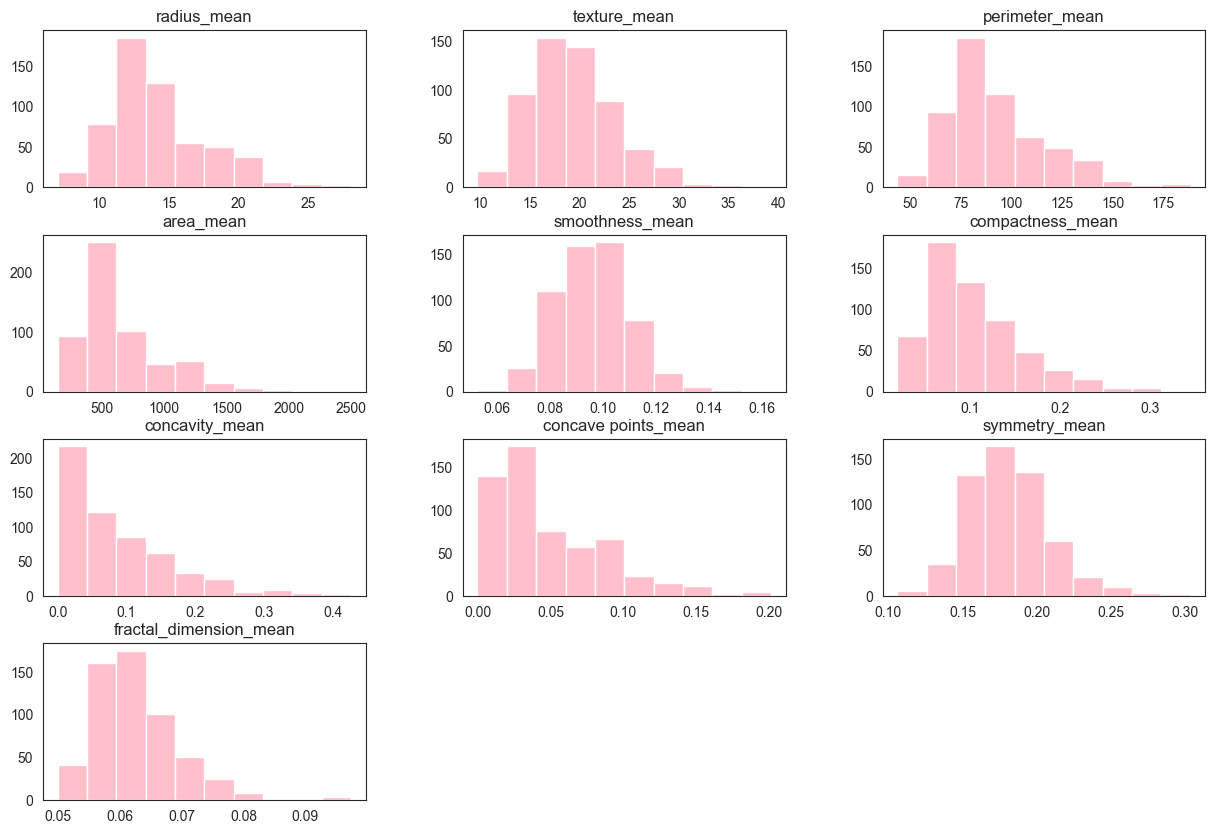

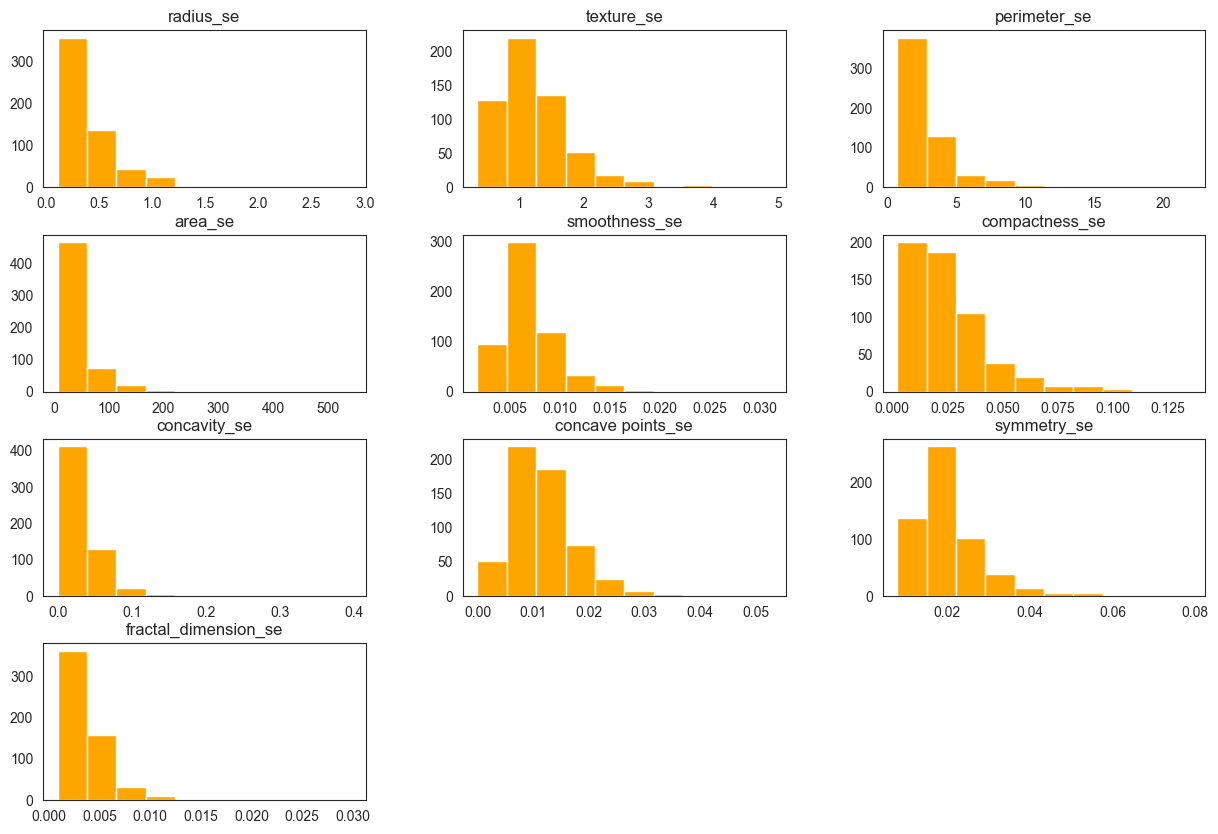

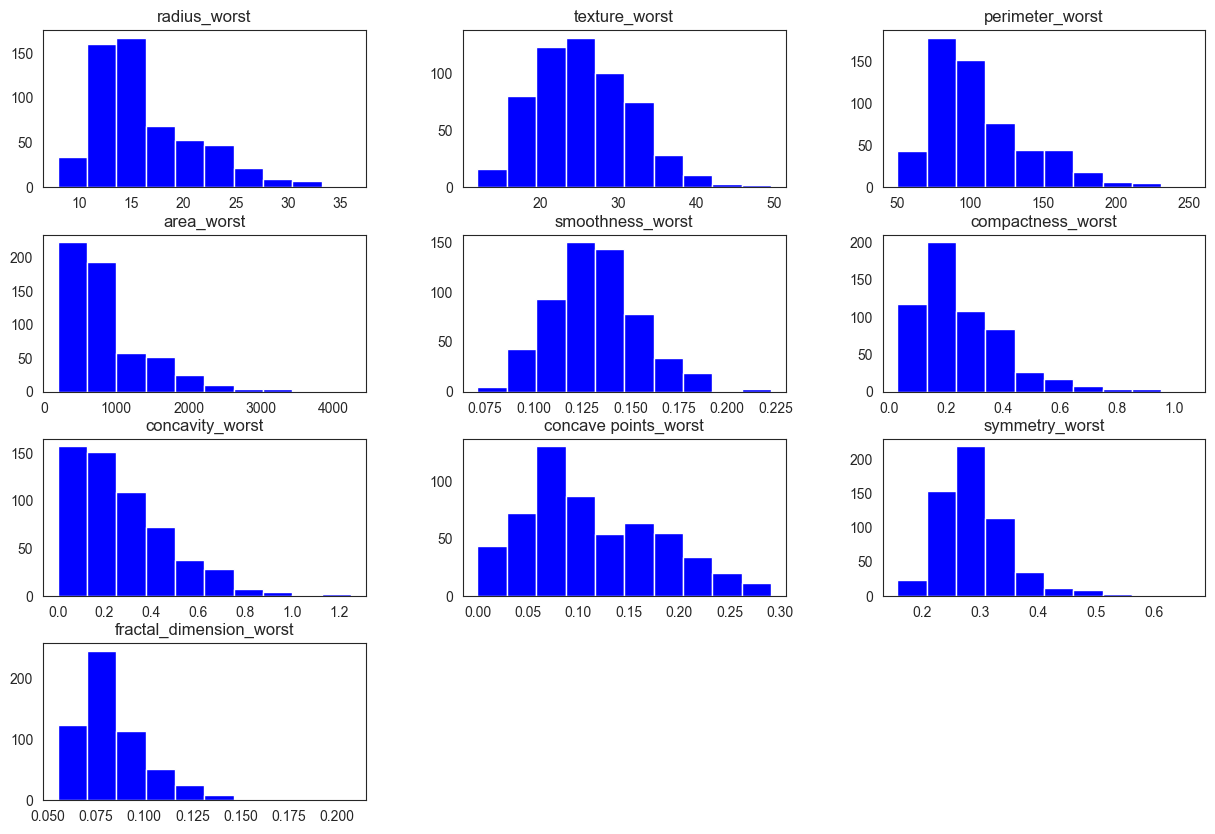

In [11]:
#Plot histograms of CUT1 variables
data_mean.hist(bins=10, figsize=(15, 10),grid=False,color = "pink")
data_se.hist(bins=10, figsize=(15, 10),grid=False,color = "orange")
data_worst.hist(bins=10, figsize=(15, 10),grid=False,color = "blue")

### 概率密度曲线

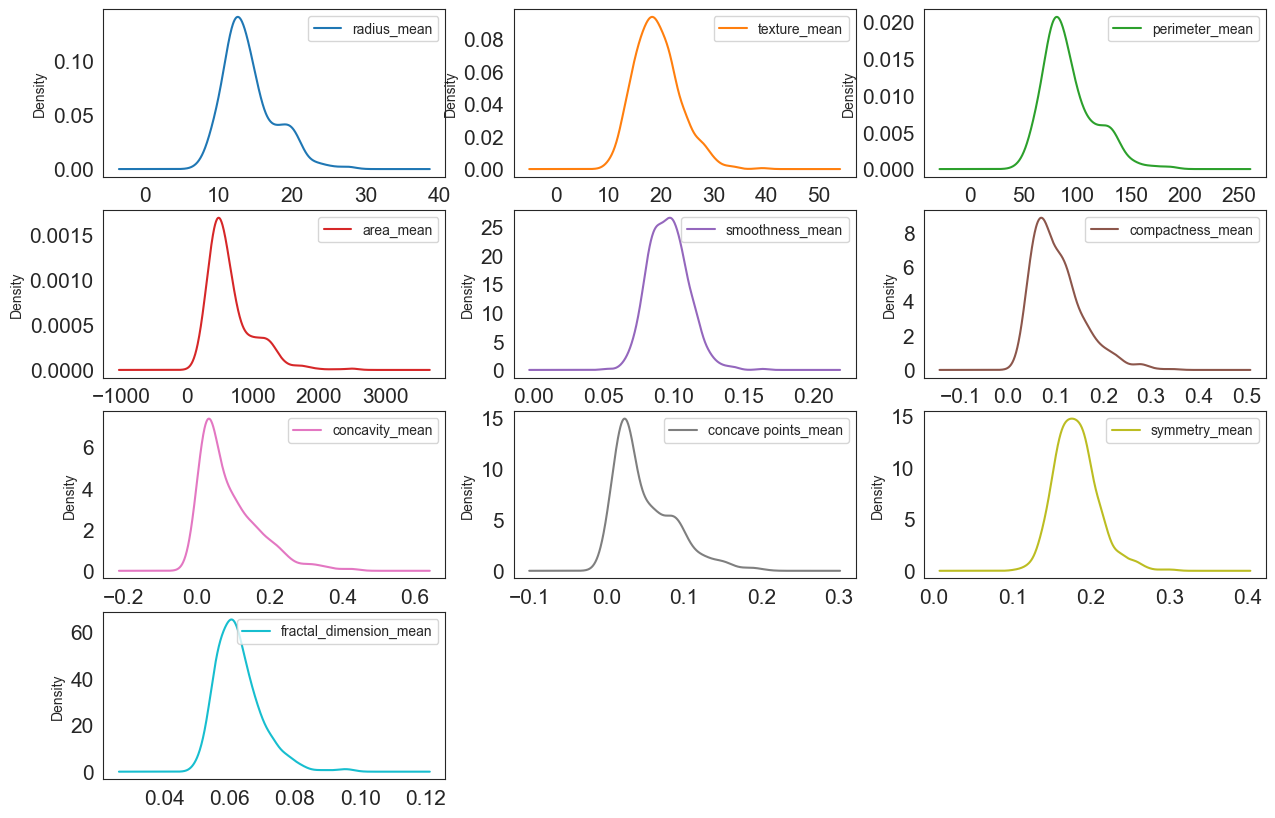

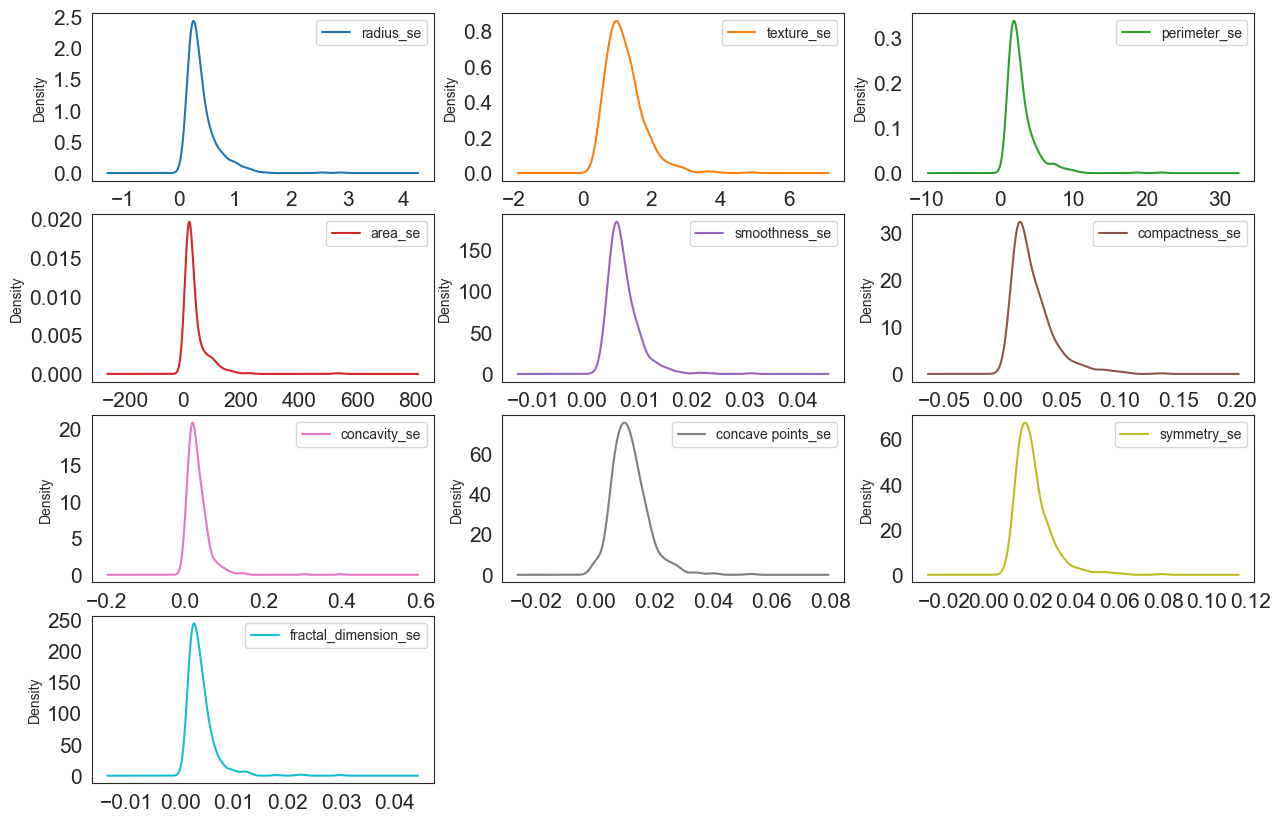

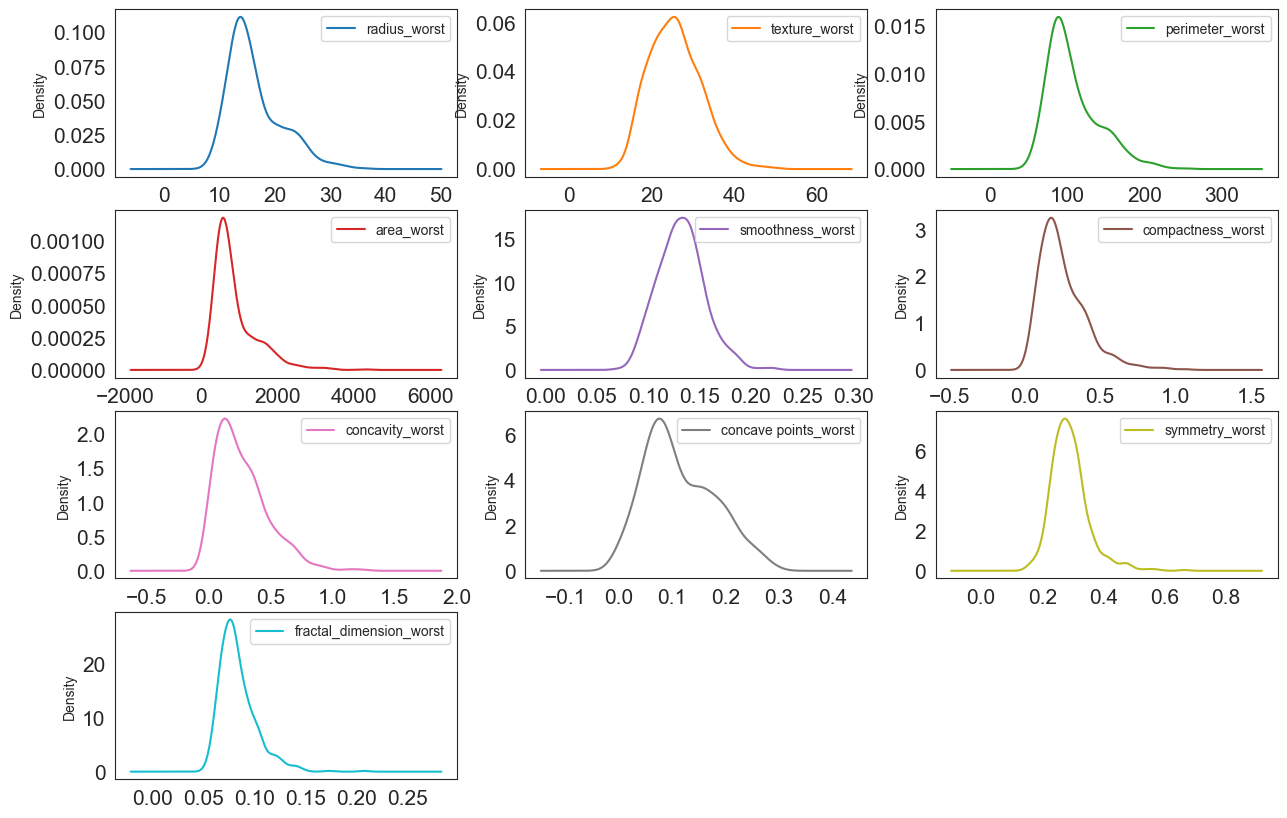

In [12]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, 
                     layout=(4,3), sharex=False, 
                     sharey=False, fontsize=15, figsize=(15,10))

plt = data_se.plot(kind= 'density', subplots=True, 
                     layout=(4,3), sharex=False, 
                     sharey=False, fontsize=15, figsize=(15,10))

plt = data_worst.plot(kind= 'density', subplots=True, 
                     layout=(4,3), sharex=False, 
                     sharey=False, fontsize=15, figsize=(15,10))

<Axes: ylabel='Frequency'>

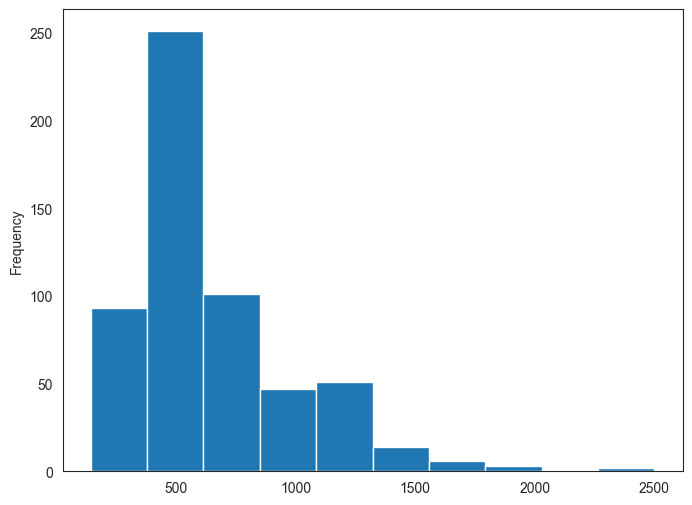

In [13]:
# 指数分布 的特征经对数（log()）变换之后可以呈高斯分布
data_mean['area_mean'].plot(kind = "hist", figsize=(8,6))

<Axes: ylabel='Frequency'>

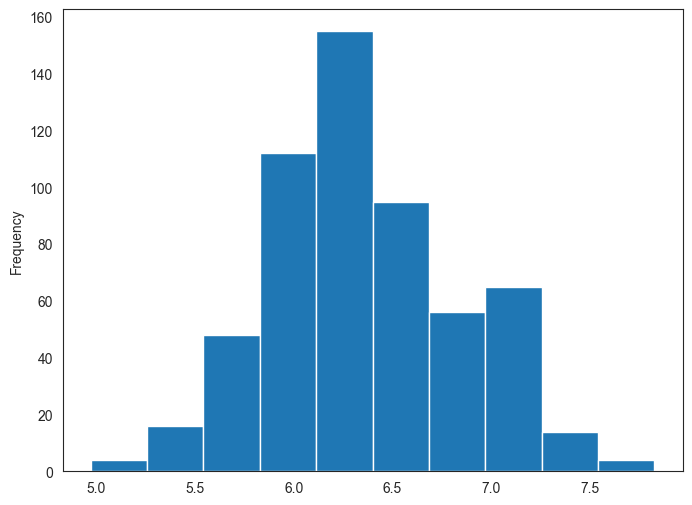

In [14]:
np.log1p(data_mean['area_mean']).plot(kind = "hist", figsize=(8,6))

<Axes: ylabel='Frequency'>

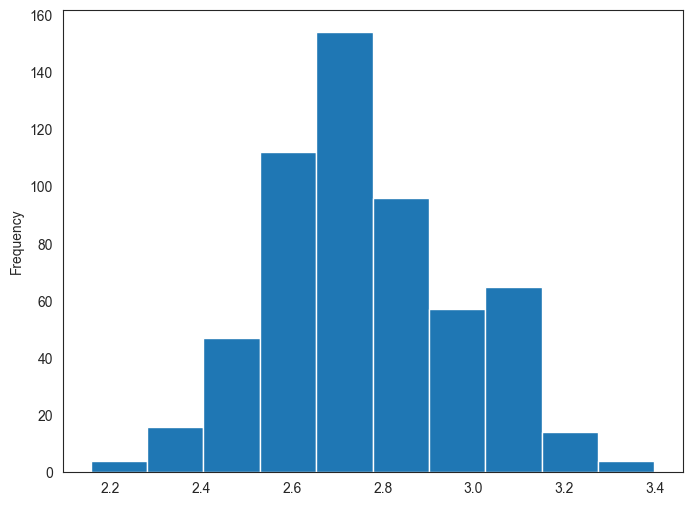

In [15]:
np.log10(data_mean['area_mean']).plot(kind = "hist", figsize=(8,6))

### 箱线图

可视化数据分布情况和异常值

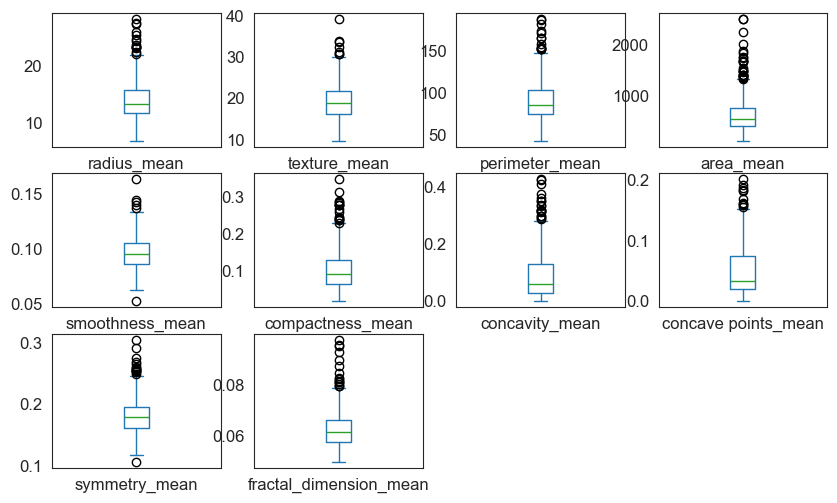

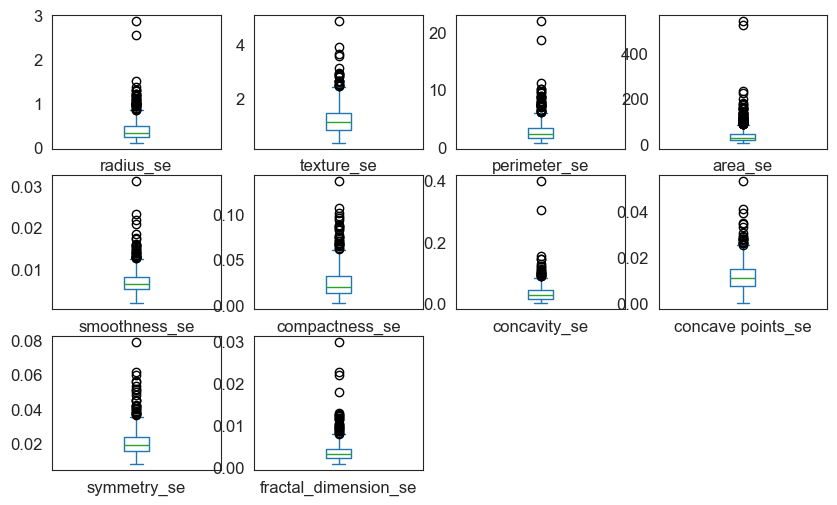

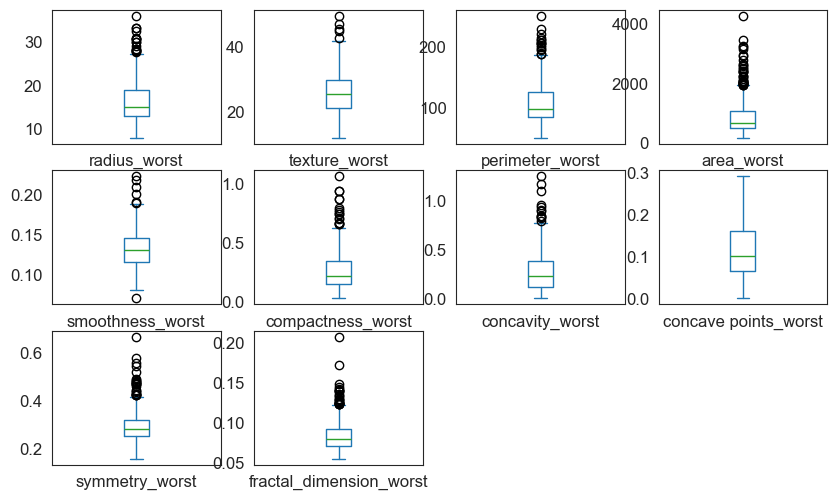

In [16]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), 
                   sharex=False, sharey=False,fontsize=12)

plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), 
                 sharex=False, sharey=False,fontsize=12)

plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), 
                 sharex=False, sharey=False,fontsize=12)

### 热力图

分析特征的相关性

<Axes: title={'center': 'Breast Cancer Feature Correlation---liziteng'}>

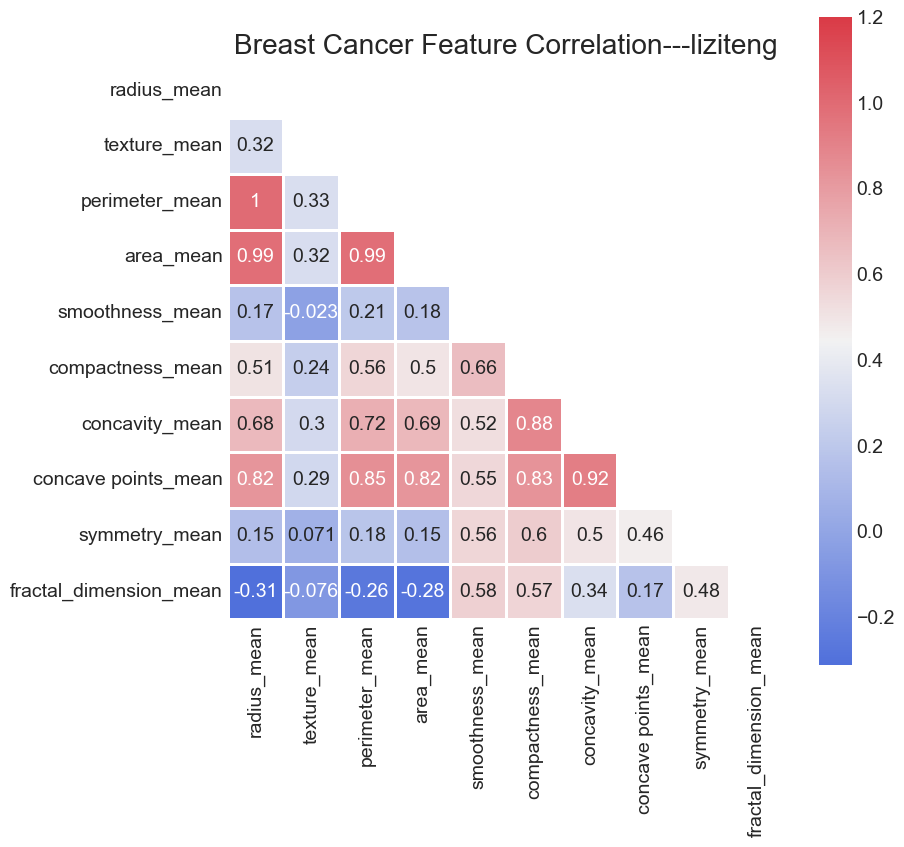

In [17]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")
# Compute the correlation matrix
corr = data_mean.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation---liziteng')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

### 散点图

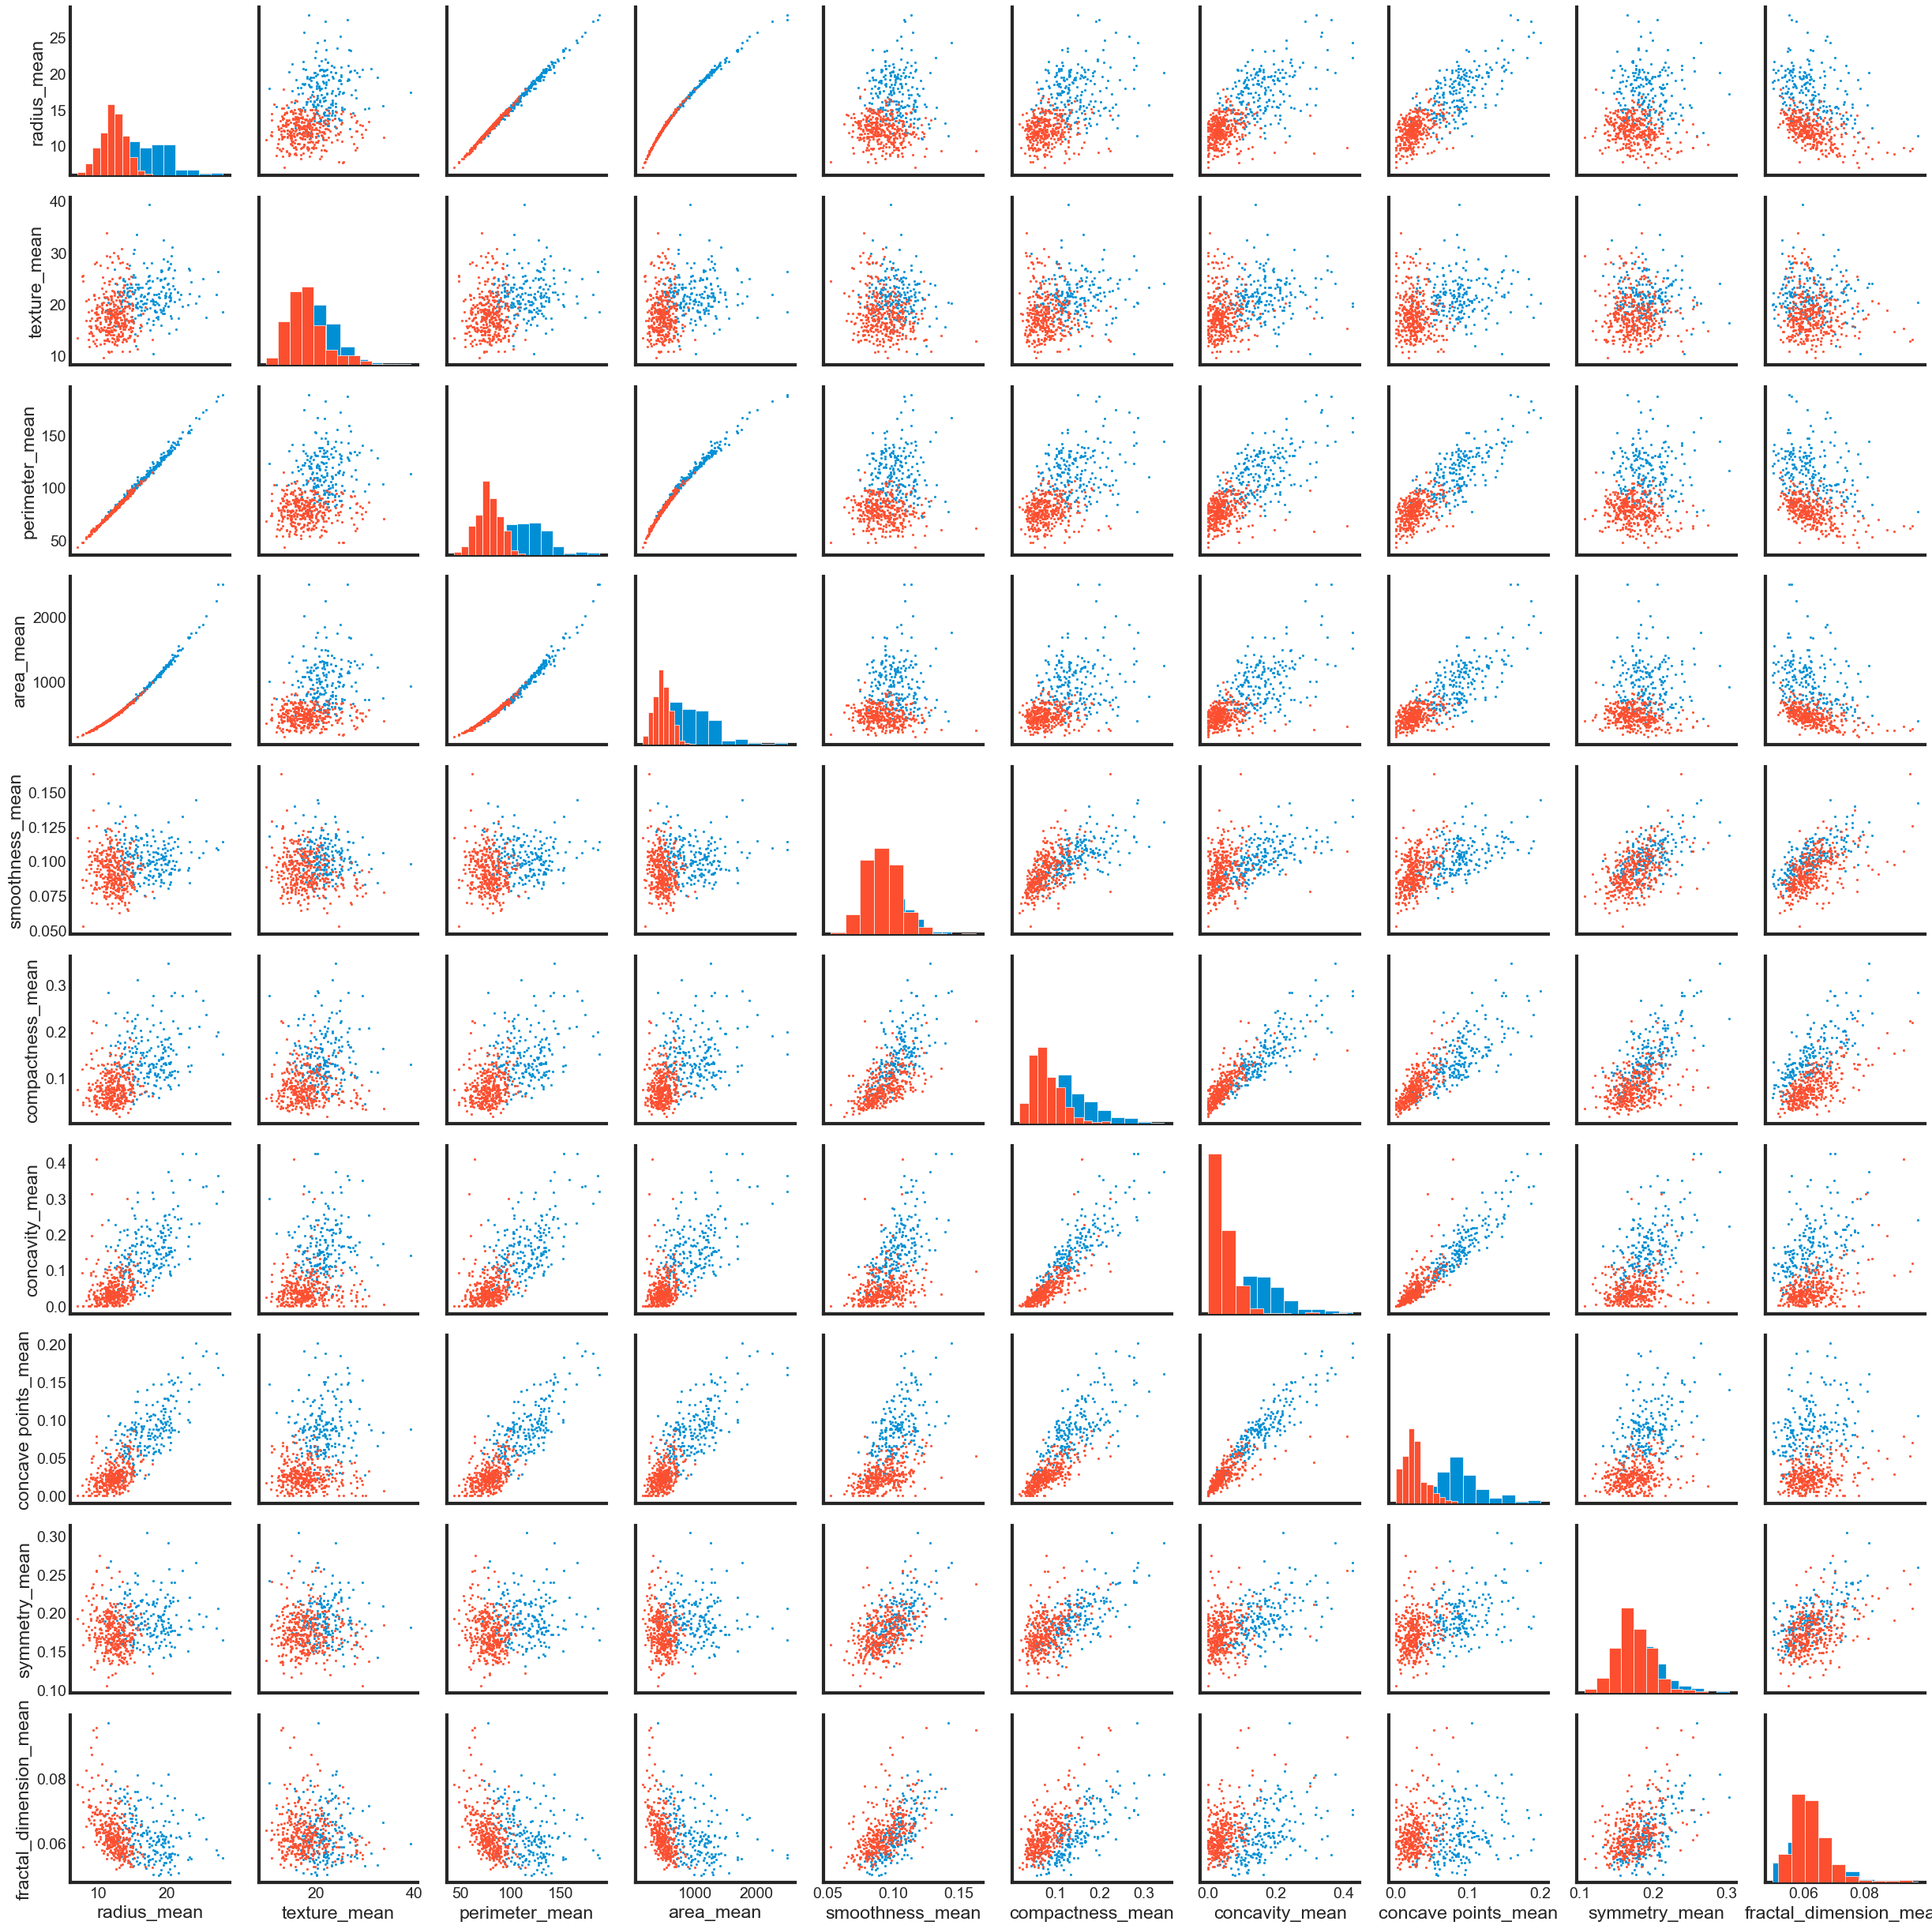

In [18]:
data = pd.read_csv('data.csv')
g = sns.PairGrid(data[data.columns.tolist()[1:12]],
                 hue ='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

我们可以看到平均值参数在 1-0.75 之间存在很强的正相关关系；。
组织核的平均面积与半径和参数的均值呈强正相关；
一些参数中度正相关（r在0.5-0.75之间）是凹度和面积，凹度和周长等; 同样，我们看到 fractal_dimension 与半径、纹理、参数平均值之间存在一些强烈的负相关。

可以看到，大多数特征对于肿瘤良恶性的区分度还是很大的。

小结：

细胞半径、周长、面积、紧密度、凹度和凹点的平均值可用于癌症的分类。 这些参数的较大值倾向于显示与恶性肿瘤的相关性。
质地、平滑度、对称性或分维数的平均值并未显示出较好的诊断偏好。
在任何直方图中，都没有明显的异常值需要进一步清理。

## 预处理与特征工程

### 导入包

In [19]:
%matplotlib inline
from scipy.stats import norm
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'
data = pd.read_csv('data.csv', index_col=False)

### 划分训练集和测试集

In [20]:
#Assign predictors to a variable of ndarray (matrix) type
X = data.iloc[:,2:32]
y = data.iloc[:,1].apply(lambda x: 1 if x == "M" else 0)

from sklearn.model_selection import train_test_split
##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

### 数据标准化

In [21]:
from sklearn.preprocessing import StandardScaler
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

### PCA降维

In [22]:
from sklearn.decomposition import PCA
# 从 30维 降到 10维
pca = PCA(n_components=10)
fit = pca.fit(Xs)

X_pca = pca.transform(Xs)

取前两个PC 进行画图，查看降维后特征的区分度

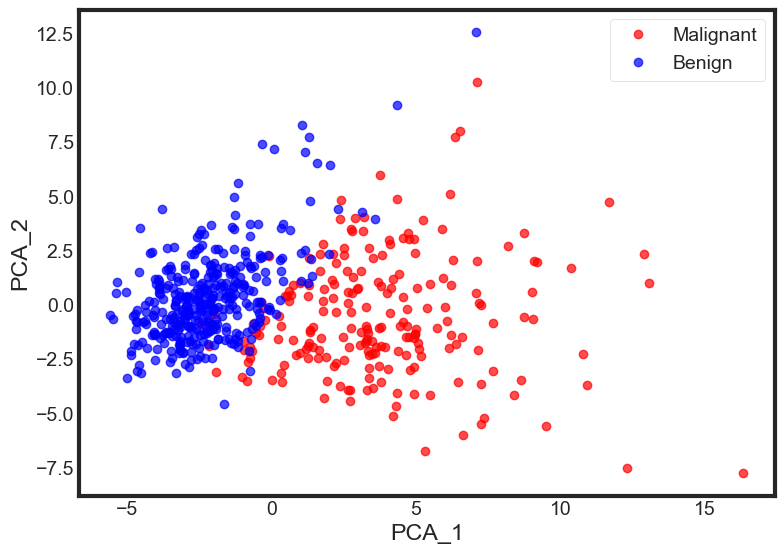

In [23]:
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
## 可视化
plt.figure(figsize=(8,6))
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],
         PCA_df['PCA_2'][data.diagnosis == 'M'],
         'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],
         PCA_df['PCA_2'][data.diagnosis == 'B'],
         'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

通过拐点，确定选择前几个主成分用于后续建模

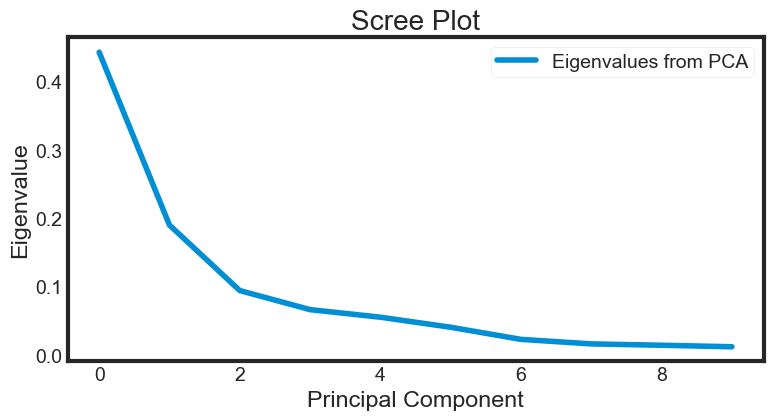

In [24]:

var = pca.explained_variance_ratio_
### 通过拐点确定选择前几个PC
fig,ax = plt.subplots(1,1)
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], 
                 loc='best', 
                 borderpad=0.3,
                 shadow=False,
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

## KNN算法

默认参数

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
from sklearn.metrics import classification_report
print("训练集的模型评估指标：")
model_score=model.score(X_train,y_train)
print()
print('The accuracy of train data',model_score)
print('--------------------------------------------------------------------------')
y_train_predict=model.predict(X_train)
model_report1=classification_report(y_train,y_train_predict)
print(model_report1)

print("测试集的模型评估指标：")
model_score=model.score(X_test,y_test)
print()
print('The accuracy of test data is',model_score)
print('--------------------------------------------------------------------------')
y_predict=model.predict(X_test)
model_report=classification_report(y_test,y_predict)
print(model_report)
print('--------------------------------------------------------------------------')

训练集的模型评估指标：

The accuracy of train data 0.9483568075117371
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       259
           1       0.95      0.92      0.93       167

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426

测试集的模型评估指标：

The accuracy of test data is 0.9440559440559441
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

--------------------------------------------------------------------------


In [27]:
import joblib
joblib.dump(model,'model_knn.pkl')  

['model_knn.pkl']

#### 交叉验证
第4次的交叉验证分析已经可以很好地预测肿瘤的良恶性

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import random
X = data.iloc[:,2:32] # features
y = data.iloc[:,1] # label
# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)
classifier_score = model.score(X_test, y_test)*100
print ('The classifier accuracy score is {:03.2f}% \n'.format(classifier_score))

for i in range(2,6):
   cv_error = np.average(cross_val_score(KNeighborsClassifier(), Xs, y, cv=i)) * 100
   print('The {}-fold cross-validation accuracy score for this classifier is {:.2f} % \n'.format(i, cv_error))

The classifier accuracy score is 94.41% 

The 2-fold cross-validation accuracy score for this classifier is 95.61 % 

The 3-fold cross-validation accuracy score for this classifier is 96.13 % 

The 4-fold cross-validation accuracy score for this classifier is 96.49 % 

The 5-fold cross-validation accuracy score for this classifier is 96.49 % 



#### 模型评估（ROC曲线图）

##### 决策树

In [29]:
# 使用信息熵作为划分标准，训练决策树
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix # 生产混淆矩阵
from sklearn import tree
clf_d = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_d.fit(X_train,y_train)
prediction=clf_d.predict(X_test)
print("训练集上的准确率：",clf_d.score(X_train,y_train))
print("预测结果：")
y_pred = clf_d.predict(X_test)
print(y_pred)
print("测试集上的准确率：",accuracy_score(prediction,y_test))
print(classification_report(y_test,y_pred))

训练集上的准确率： 1.0
预测结果：
[0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
测试集上的准确率： 0.9020979020979021
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        98
           1       0.88      0.80      0.84        45

    accuracy                           0.90       143
   macro avg       0.89      0.87      0.88       143
weighted avg       0.90      0.90      0.90       143



###### 交叉验证

In [30]:
acc=cross_val_score(clf_d,X,y,cv=5)
acc

array([0.89473684, 0.90350877, 0.92982456, 0.93859649, 0.94690265])

In [31]:
print(acc.mean())

0.9227138643067848


###### 调整参数

In [32]:
from sklearn.metrics import roc_curve, auc
# 预测测试集的概率
y_score = clf_d.predict_proba(X_test)[:, 1]
# 计算不同阈值下的真正例率（TPR）和假正例率（FPR）
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8744897959183674


以ROC曲线的AUC值作为评估标准，设置scoring参数为’roc_auc’

In [34]:
acc=cross_val_score(clf_d,X,y,scoring='roc_auc',cv=5)
acc

array([0.86259417, 0.89747789, 0.92956349, 0.95337302, 0.93879946])

In [35]:
print(acc.mean())

0.9163616063304895


AUC值偏低，尝试一下参数调优

GridSearch网格搜索</br>
GridSearch网格搜索是一种穷举搜索的参数调优手段：遍历所有的候选参数，循环建立模型并评估模型的有效性和准确性，选取表现最好的参数作为最终结果。

In [36]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[1,2,3,4,5,6,7,8,9],'criterion':['gini','entropy'],'min_samples_split':[5,6,7,8,9,11,12,13,14,15]}
grid_search=GridSearchCV(clf_d,parameters,scoring='roc_auc',cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 6}

In [37]:
clf_d=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_split=5)
clf_d.fit(X_train,y_train)
clf_d.score(X_train,y_train)

0.9342723004694836

In [38]:
clf_d.score(X_test,y_test)

0.9230769230769231

##### 贝叶斯

###### 建立模型，训练数据

In [39]:
# 贝叶斯
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction=gnb.predict(X_test)
print("测试机上的准确率",gnb.score(X_train,y_train))
print("预测结果：")
y_pred = gnb.predict(X_test)
print(y_pred)
print("训练集上的准确率：",accuracy_score(prediction,y_test))

测试机上的准确率 0.9413145539906104
预测结果：
[0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
训练集上的准确率： 0.951048951048951


###### 交叉验证

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target
le = LabelEncoder()
y = le.fit_transform(Y)
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)
classifier_score=gnb.score(X_train,y_train)* 100
print ('The classifier accuracy score is {:03.2f}% \n'.format(classifier_score))
for i in range(2,6):
   cv_error = np.average(cross_val_score(GaussianNB(), Xs, y, cv=i)) * 100
   print('The {}-fold cross-validation accuracy score for this classifier is {:.2f} % \n'.format(i, cv_error))

The classifier accuracy score is 94.13% 

The 2-fold cross-validation accuracy score for this classifier is 92.80 % 

The 3-fold cross-validation accuracy score for this classifier is 92.97 % 

The 4-fold cross-validation accuracy score for this classifier is 92.97 % 

The 5-fold cross-validation accuracy score for this classifier is 92.79 % 



##### 支持向量机

In [41]:
# load package
%matplotlib inline
import matplotlib.pyplot as plt
#Load libraries for data processing
import pandas as pd 
import numpy as np
from scipy.stats import norm
## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4) 
# load dataset
data = pd.read_csv('data.csv')

In [42]:
# split features and label
X = data.iloc[:,2:32] # features
y = data.iloc[:,1] # label
# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [43]:
# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, stratify=y,
                                                    test_size=0.3, 
                                                    random_state=33)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)
 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)*100
print ('The classifier accuracy score is {:03.2f}% \n'.format(classifier_score))

The classifier accuracy score is 96.49% 



In [44]:
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds)) * 100
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f} % \n'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 97.36 % 



In [45]:
from sklearn.feature_selection import SelectKBest, f_regression
# clf2 is a pipline
clf2 = make_pipeline(SelectKBest(f_regression, k=3),
                     SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds)) * 100
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f} %\n'.format(n_folds, cv_error))

The 3-fold cross-validation accuracy score for this classifier is 97.36 %



In [46]:
X = data.iloc[:,2:32] # features
y = data.iloc[:,1] # label
# transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [47]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

In [48]:
from sklearn.svm import SVC
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.3, 
                                                    random_state=2, 
                                                    stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



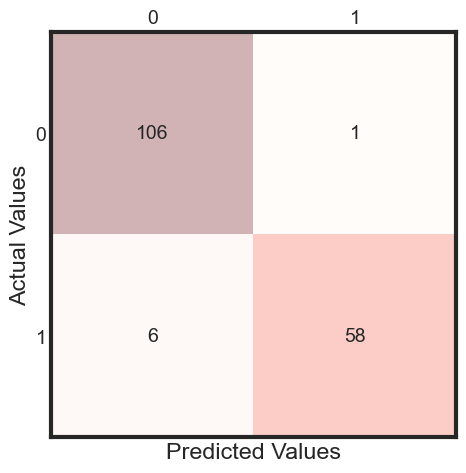

In [49]:
## plot confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [50]:
# Train classifiers.
kernel_values = ['linear','rbf']
param_grid = {'C': np.logspace(-3, 1, 100),
              'gamma': np.logspace(-3, 2, 100),
              'kernel': kernel_values}

grid = GridSearchCV(SVC(), scoring="roc_auc",
                    param_grid=param_grid, 
                    cv=5)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.020565123083486514, 'kernel': 'rbf'} with a score of 1.00


In [51]:
svc_model = SVC(**grid.best_params_,
         probability=True,
         random_state=33)

y_pred = svc_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



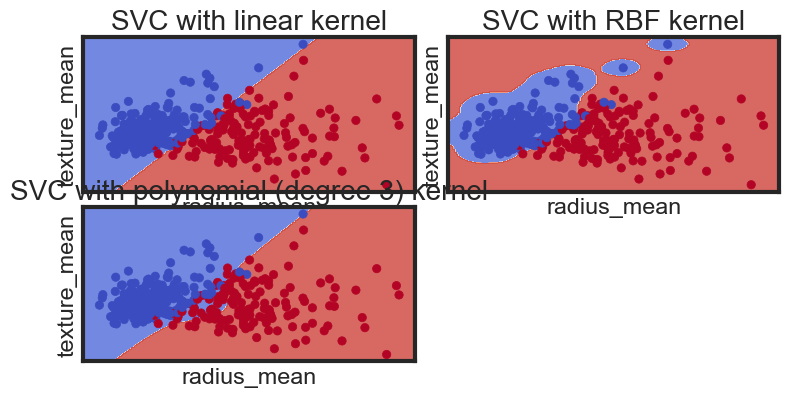

In [52]:
def meshgrid(feat1,feat2):
    x_min, x_max = feat1.min() - 1, feat1.max() + 1
    y_min, y_max = feat2.min() - 1, feat2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))
    return xx, yy

Xtrain = X_train[:, :2]
xx,yy = meshgrid(Xtrain[:, 0],Xtrain[:, 1])

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

svm = SVC(kernel='linear',C=1,random_state=0).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf',gamma=0.7, C=1, random_state=0).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly',degree=3, C=1, random_state=0).fit(Xtrain, y_train)

for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [73]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(X_train,y_train)
prediction=svc_model.predict(X_test)
print("准确率：",accuracy_score(prediction,y_test))

准确率： 0.9300699300699301


##### 随机森林

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#模型调用
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,X_train,y_train,cv=5).mean()
score_pre
#交叉验证，划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(Xs, y, stratify=y,
                                                    test_size=0.3, 
                                                    random_state=33)
from sklearn.ensemble import RandomForestClassifier

0.9598101265822784 21


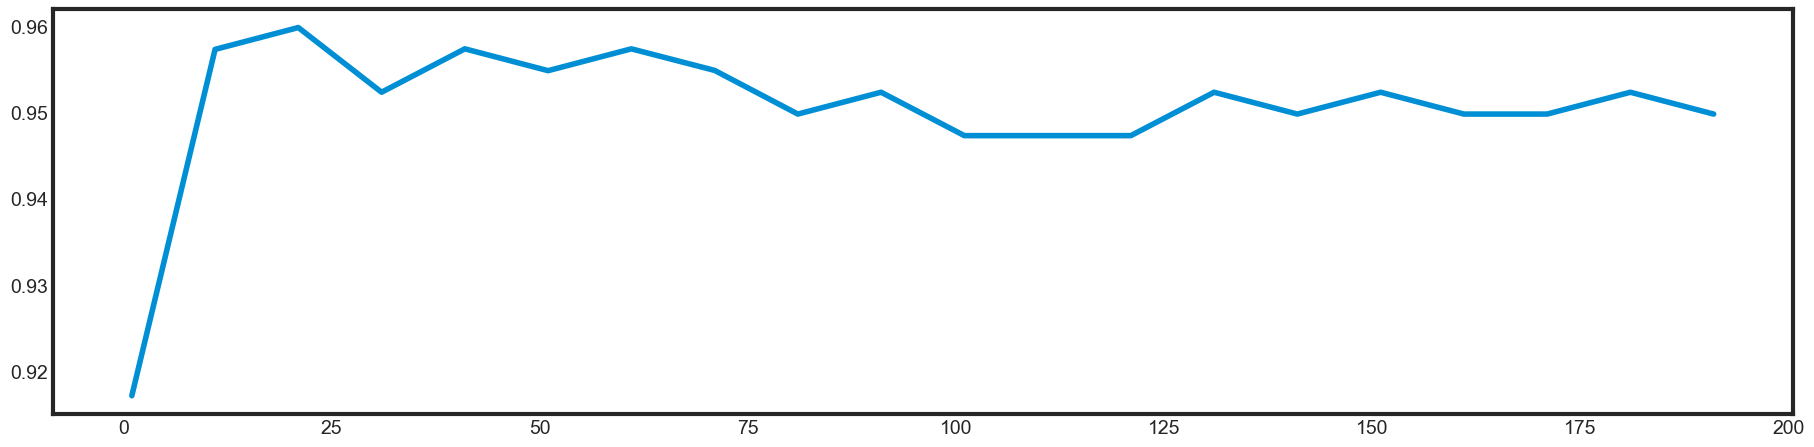

0.9623417721518986 18


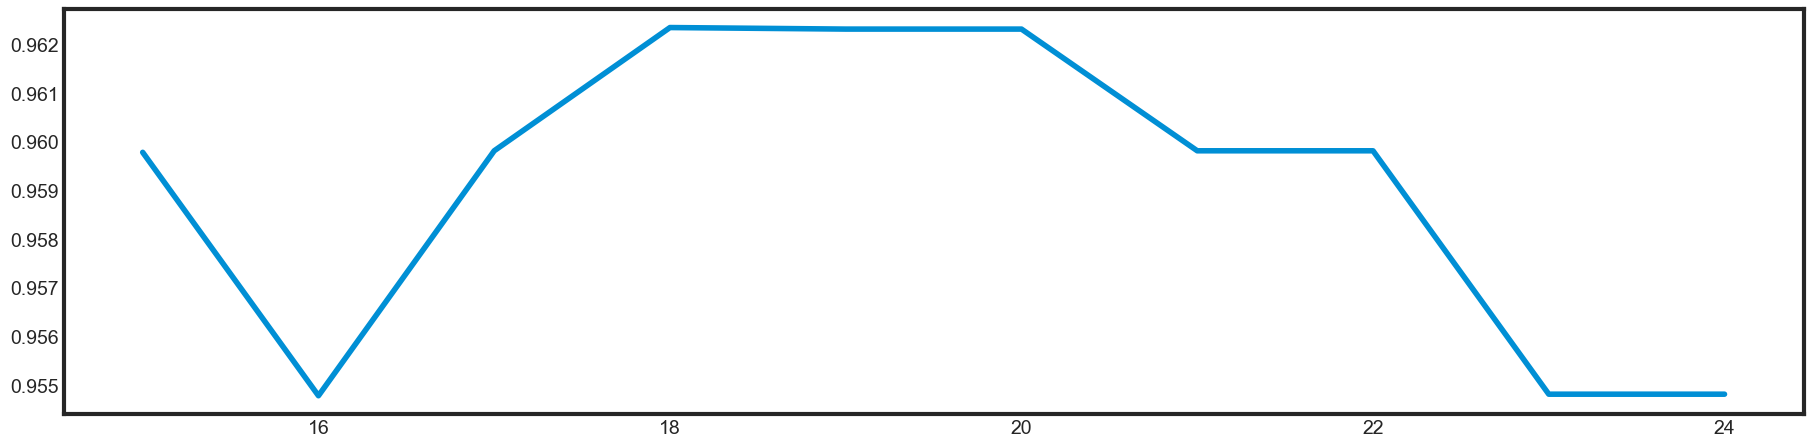

In [55]:
#1.调n_estimators
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

scorel = []
for i in range(15,25):   # 在上一步得出的21结果附近再细化探索
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    scorel.append(score)
 
print(max(scorel),([*range(15,25)][scorel.index(max(scorel))]))

plt.figure(figsize=[20,5])
plt.plot(range(15,25),scorel)
plt.show()

In [56]:
#2.调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响
 
rfc = RandomForestClassifier(n_estimators=18
                             ,random_state=90
                            )
 
GS = GridSearchCV(rfc,param_grid,cv=5)  #网格搜索
GS.fit(X_train,y_train)
GS.best_params_

{'max_depth': 7}

In [57]:
# 3.调整max_features，总共有30个特征，默认值为根号30≈5.
param_grid = {'max_features':np.arange(5,30,1)}    # 往复杂度高的方向调
 
rfc = RandomForestClassifier(n_estimators=18
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_train,y_train)
GS.best_params_

#4.调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}   # 默认为1（最大复杂度）
 
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
 
rfc = RandomForestClassifier(n_estimators=18
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_train,y_train)
 
GS.best_params_

{'min_samples_leaf': 1}

In [58]:
#5.调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}   # 默认为2（最大复杂度）
 
rfc = RandomForestClassifier(n_estimators=18
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_train,y_train)
 
GS.best_params_

{'min_samples_split': 2}

In [59]:
#6.调整Criterion
param_grid = {'criterion':['gini', 'entropy']}
 
rfc = RandomForestClassifier(n_estimators=18
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_train,y_train)
 
GS.best_params_

rfc = RandomForestClassifier(n_estimators=18,max_features=23,random_state=90)
score = cross_val_score(rfc,X_test,y_test,cv=5).mean()
print(score)
score - score_pre   # 调参前后准确率的变动

0.9294117647058824


-0.010208488458674725

##### 逻辑回归

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np
from scipy.stats import norm

import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4) 

In [61]:
#划分训练集和测试集
X = data.iloc[:,2:32]
y = data.iloc[:,1].apply(lambda x: 1 if x == "M" else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [62]:
#模型训练
import numpy as np
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
train_score = model_log.score(X_train, y_train)
test_score = model_log.score(X_test, y_test)
#模型评估
print("train score: {train_score:.6f}; test score: {test_score:.6f}".format(train_score=train_score, test_score=test_score))

train score: 0.955399; test score: 0.944056


In [63]:
# 模型预测
y_pred = model_log.predict(X_test)
print("matchs: {0}/{1}".format(np.equal(y_pred, y_test).shape[0], y_test.shape[0]))

matchs: 143/143


In [64]:
#模型调优
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# 构建多项式模型
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_feature", polynomial_features), ("logistic_regression", logistic_regression)])
    return pipeline
model_log = polynomial_model(degree=2, penalty="l1",solver='liblinear')
model_log.fit(X_train, y_train)
train_score_v2 = model_log.score(X_train, y_train)
cv_score_v2 = model_log.score(X_test, y_test)
print("train_score: {:.6f}, cv_score: {:.6f}".format(train_score_v2, cv_score_v2))

train_score: 0.995305, cv_score: 0.972028


##### 绘制roc曲线图的函数

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
import joblib
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

model=joblib.load('model_knn.pkl')     #调入模型

def multi_models_roc(names,sampling_methods,colors,X_test,y_test,save=True,dpin=100):
    plt.figure(figsize=(14,14),dpi=dpin)
    for (name,method,colorname) in zip(names,sampling_methods,colors):
        y_test_preds=method.predict(X_test)
        y_test_predprob = method.predict_proba(X_test)[:,1]
        fpr,tpr,thresholds = roc_curve(y_test,y_test_predprob,pos_label=1)
        plt.plot(fpr,tpr,lw=5,label='{}(AUC={:.3f})'.format(name,auc(fpr,tpr)),color=colorname)
        plt.plot([0,1],[0,1],'--',lw=5,color='grey')
        plt.axis('square')
        plt.xlim([-0.1,1])
        plt.ylim([-0.1,1])
        plt.xlabel("False Positive Rate",fontsize=20)
        plt.ylabel("True Positive Rate",fontsize=20)
        plt.title(u'混合算法ROC对比图',fontproperties=font_set)
        plt.legend(loc='lower right',fontsize=20) 
    if save:
       plt.savefig('multi_models_roc.png')
    return plt
 

#### KNN算法调整参数

In [66]:
model1=KNeighborsClassifier(n_neighbors=6)
model1.fit(X_train,y_train)
print("训练集的模型评估指标：")
model_score1=model1.score(X_train,y_train)
print()
print('The accuracy of train data',model_score1)
print('--------------------------------------------------------------------------')
y_train_predict_1=model1.predict(X_train)
model_report1_1=classification_report(y_train,y_train_predict_1)
print(model_report1_1)

print("测试集的模型评估指标：")
model_score1=model.score(X_test,y_test)
print()
print('The accuracy of test data is',model_score1)
print('--------------------------------------------------------------------------')
y_predict_1=model.predict(X_test)
model_report_1=classification_report(y_test,y_predict_1)
print(model_report_1)
print('--------------------------------------------------------------------------')

训练集的模型评估指标：

The accuracy of train data 0.9460093896713615
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       259
           1       0.96      0.90      0.93       167

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426

测试集的模型评估指标：

The accuracy of test data is 0.9440559440559441
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

--------------------------------------------------------------------------


In [67]:
model2=KNeighborsClassifier(n_neighbors=4)
model2.fit(X_train,y_train)
print("训练集的模型评估指标：")
model_score_2=model2.score(X_train,y_train)
print()
print('The accuracy of train data',model_score_2)
print('--------------------------------------------------------------------------')
y_train_predict_2=model2.predict(X_train)
model_report1_2=classification_report(y_train,y_train_predict_2)
print(model_report1_2)

print("测试集的模型评估指标：")
model_score_2=model2.score(X_test,y_test)
print()
print('The accuracy of test data is',model_score_2)
print('--------------------------------------------------------------------------')
y_predict_2=model2.predict(X_test)
model_report_2=classification_report(y_test,y_predict_2)
print(model_report_2)
print('--------------------------------------------------------------------------')

训练集的模型评估指标：

The accuracy of train data 0.9530516431924883
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       259
           1       0.99      0.89      0.94       167

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.96      0.95      0.95       426

测试集的模型评估指标：

The accuracy of test data is 0.9300699300699301
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.97      0.80      0.88        45

    accuracy                           0.93       143
   macro avg       0.94      0.89      0.91       143
weighted avg       0.93      0.93      0.93       143

--------------------------------------------------------------------------


In [68]:
model3=KNeighborsClassifier(n_neighbors=5,weights='distance')
model3.fit(X_train,y_train)
print("训练集的模型评估指标：")
model_score_3=model3.score(X_train,y_train)
print()
print('The accuracy of train data',model_score_3)
print('--------------------------------------------------------------------------')
y_train_predict_3=model3.predict(X_train)
model_report1_3=classification_report(y_train,y_train_predict_3)
print(model_report1_3)

print("测试集的模型评估指标：")
model_score_3=model3.score(X_test,y_test)
print()
print('The accuracy of test data is',model_score_3)
print('--------------------------------------------------------------------------')
y_predict_3=model3.predict(X_test)
model_report_3=classification_report(y_test,y_predict_3)
print(model_report_3)
print('--------------------------------------------------------------------------')

训练集的模型评估指标：

The accuracy of train data 1.0
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       167

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

测试集的模型评估指标：

The accuracy of test data is 0.9440559440559441
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

--------------------------------------------------------------------------


可以看出，n_neigbors=5为最佳参数

#### 最终预测结果可视化

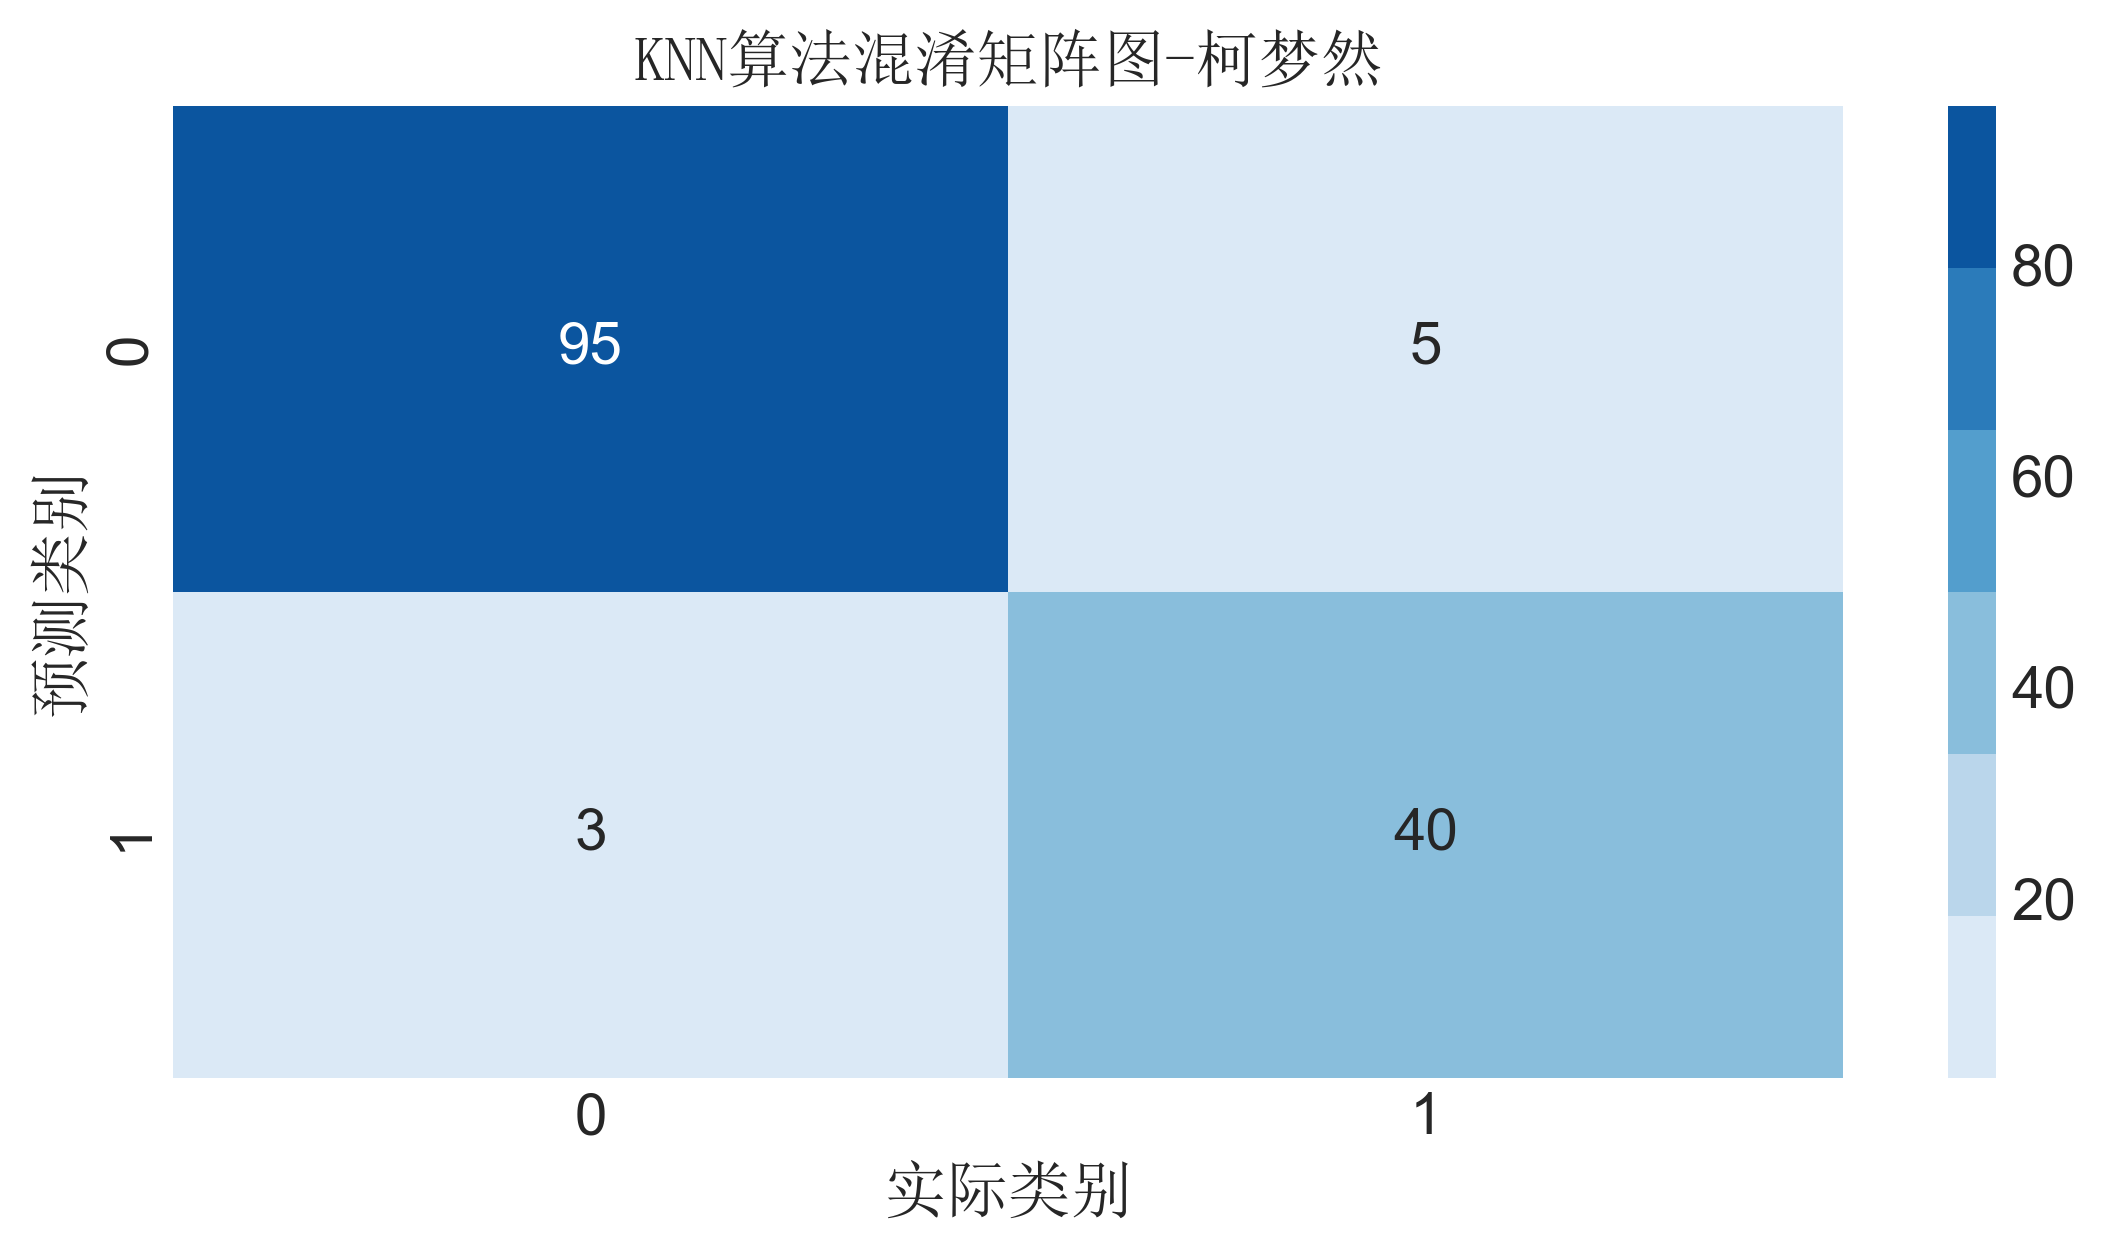

In [69]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot                   #解决xlabel,ylabel的中文乱码问题
y_pred=model.predict(X_test)       
model.score(X_test,y_test)
pred=model.predict(X_test)
cm=confusion_matrix(pred,y_test)
plt.figure(dpi=300)
sns.heatmap(cm,cmap=sns.color_palette("Blues"),annot=True,fmt='d')
plt.xlabel(u'实际类别',fontproperties=font_set)
plt.ylabel(u'预测类别',fontproperties=font_set)
plt.savefig('matrix1.png')
plt.title(u"KNN算法混淆矩阵图-柯梦然",fontproperties=font_set)
plt.show()    

##### 不同算法roc曲线图比较

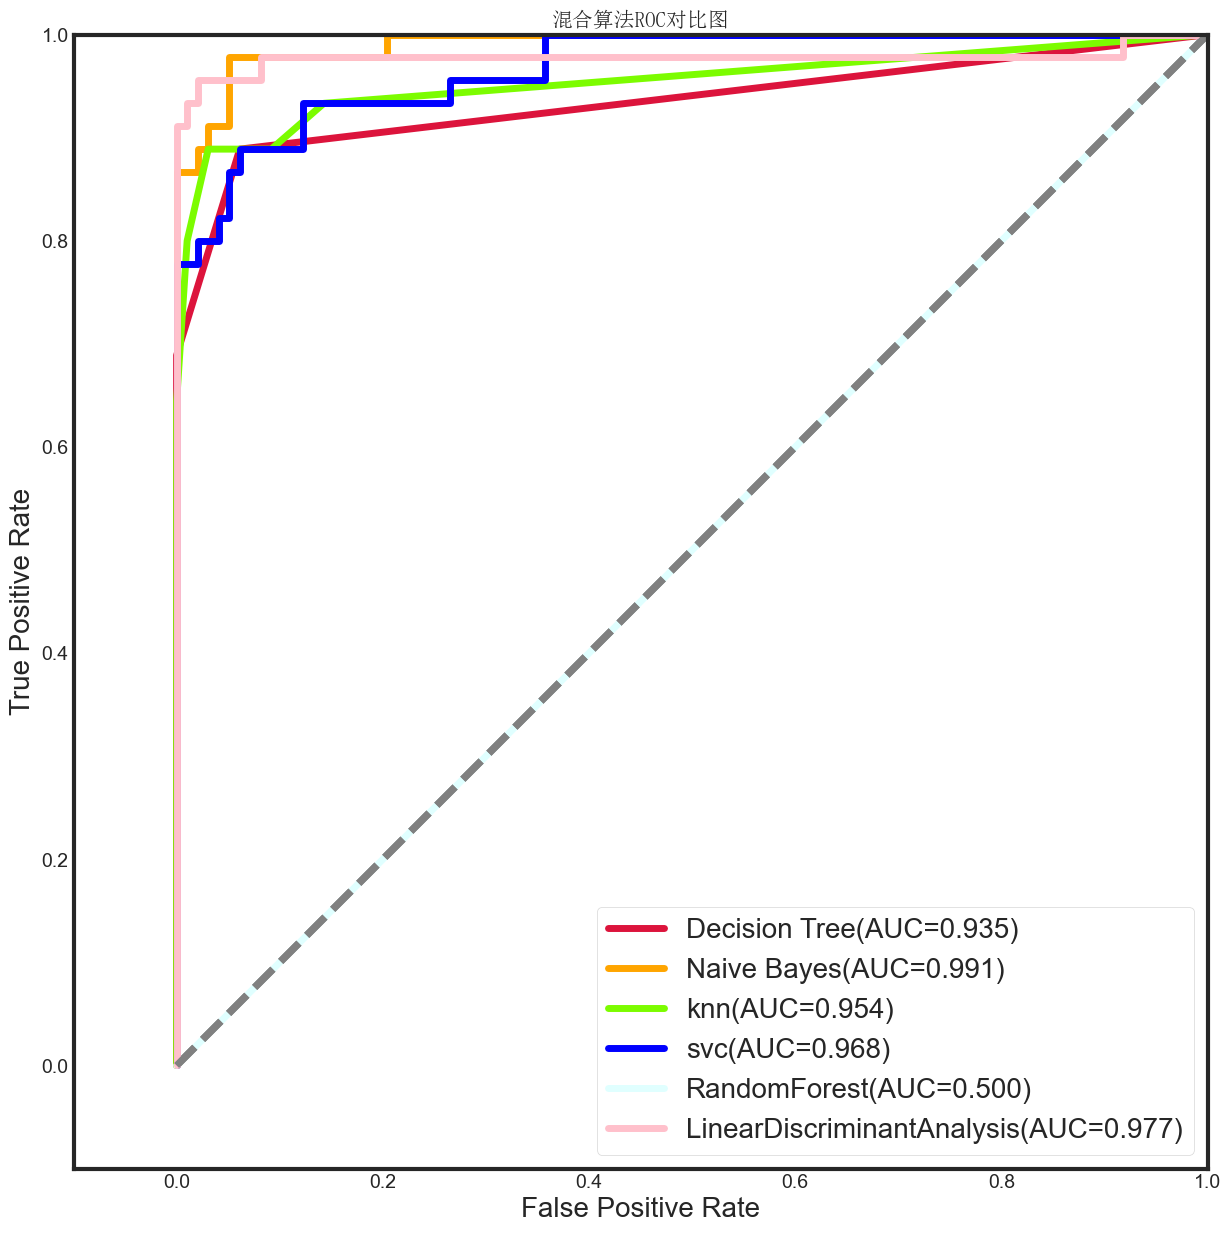

In [80]:
names = ['Decision Tree', # 这个就是模型标签，我们使用三个，所以需要三个标签
         'Naive Bayes',
         'knn','svc','RandomForest','LinearDiscriminantAnalysis']

sampling_methods = [clf_d, # 这个就是训练的模型。
                    gnb,
                    model,
                    svc_model,
                    GS,
                    model_log
                   ]

colors = ['crimson',  # 这个是曲线的颜色，几个模型就需要几个颜色哦！
          'orange',
          'lawngreen',
          'blue',
          'lightcyan',
          'pink'
         ]

#ROC curves
test_roc_graph = multi_models_roc(names, sampling_methods, colors, X_test, y_test, save = True)  # 这里可以改成训练集
test_roc_graph.savefig('ROC_Train_all_1.png')

##### 不同模型间比较

In [71]:
def bxplots(results,names):
    fig = plt.figure()
    fig.suptitle(u'Algorithm Comparison-柯梦然',fontproperties=font_set)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

def piplinecompare(models, X_train, y_train):
    results = []
    names = []
    for name, model in models:
        kfold = KFold( n_splits=10,shuffle=True,random_state=7)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return results,names

LR: 0.990385 (0.006789)
LDA: 0.995554 (0.006775)
KNN: 0.962663 (0.030646)
CART: 0.899251 (0.064631)
NB: 0.983367 (0.019504)
SVM: 0.975341 (0.014173)


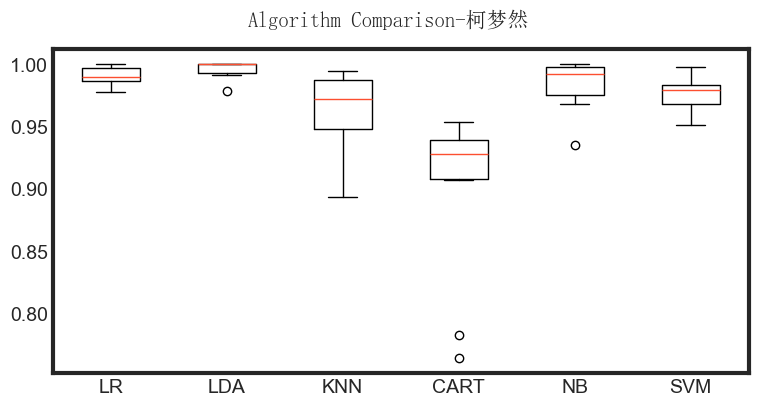

ScaledLR: 0.992510 (0.008993)
ScaledLDA: 0.995554 (0.006775)
ScaledKNN: 0.984183 (0.019713)
ScaledCART: 0.914378 (0.062399)
ScaledNB: 0.984225 (0.019993)
ScaledSVM: 0.991093 (0.010925)


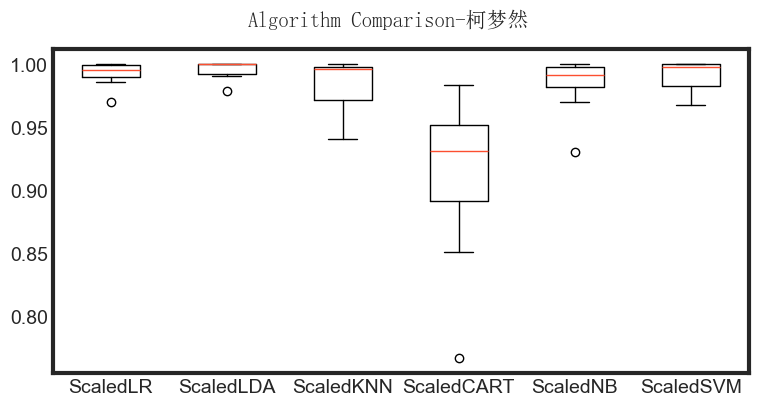

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))


results,names = piplinecompare(models, X_train, y_train)
bxplots(results,names)

results1,names1 = piplinecompare(pipelines, X_train, y_train)
bxplots(results1,names1)